# The k-Nearest Neighbors Algorithm

## Introduction

The k-Nearest Neighbors (k-NN) algorithm is a versatile machine learning method used for classification and regression tasks. It is an instance-based learning approach, relying on the principle of similarity: similar data points tend to have similar outcomes. k-NN is a non-parametric and lazy learning algorithm, meaning it makes predictions based on the closest data points in the training set without explicit model training.

This notebook demonstrates the implementation of k-NN on the Wine Quality Dataset, which contains data on various physicochemical properties of wines and a quality rating from 1 to 10.

## k-NN Algorithm Overview

1. **Initialization**: Start with a labeled training dataset.
2. **Distance Calculation**: Compute the distance between the new, unlabeled data point and all training data points.
3. **k-Nearest Neighbors Selection**: Select the 'k' closest points in the training set.
4. **Prediction**:
    - **Classification**: Use majority voting among the k-nearest neighbors.
    - **Regression**: Predict by averaging the target values of the k-nearest neighbors.

## Advantages and Disadvantages

**Advantages**:
- Simple to implement and understand.
- Effective in cases with complex decision boundaries.
- No model training phase, ideal for scenarios where real-time prediction is valued.

**Disadvantages**:
- High computation cost since distances are recalculated for each prediction.
- Sensitive to the choice of 'k' and the distance metric.
- Performance degrades with high-dimensional data (curse of dimensionality).

## Dataset Overview

The Wine Quality Dataset includes parameters such as acidity, sugar, pH, alcohol, and other properties that influence wine quality. We'll use these features to predict the quality rating of the wines, treating this as a regression problem to predict exact quality scores and as a classification problem to categorize wines into high and low quality.

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wine_data = pd.read_csv(url, delimiter=';')
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Data Preprocessing

We'll prepare the data for modeling by encoding any categorical variables if necessary, scaling the numerical features to ensure fair comparison, and splitting the dataset into training and testing sets.

In [6]:
# Scale the features
scaler = StandardScaler()
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

## k-NN Regression Implementation

First, we will implement k-NN for regression to predict the quality score of the wines.

In [7]:
# Initialize and train the k-NN regressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred_reg = knn_regressor.predict(X_test)

# Evaluate the regressor
mse = mean_squared_error(y_test, y_pred_reg)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.45574999999999993


## k-NN Classification Implementation

Now, let's use k-NN for classification by categorizing wine quality into 'High' (7 and above) or 'Low' (less than 7).

In [8]:
# Convert quality scores into categorical data
y_train_cat = (y_train >= 7).astype(int)
y_test_cat = (y_test >= 7).astype(int)

# Initialize and train the k-NN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train_cat)

# Predict on the test set
y_pred_class = knn_classifier.predict(X_test)

# Evaluate the classifier
print('Classification Report:\n', classification_report(y_test_cat, y_pred_class))
print('Confusion Matrix:\n', confusion_matrix(y_test_cat, y_pred_class))
print('Accuracy Score:', accuracy_score(y_test_cat, y_pred_class))

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.93       413
           1       0.55      0.45      0.49        67

    accuracy                           0.87       480
   macro avg       0.73      0.69      0.71       480
weighted avg       0.86      0.87      0.87       480

Confusion Matrix:
 [[388  25]
 [ 37  30]]
Accuracy Score: 0.8708333333333333


## Visualizations for k-Nearest Neighbors Model

### Visualization of Decision Boundaries

Visualizing the decision boundaries can provide insights into how the k-NN algorithm partitions the feature space and makes decisions. This visualization uses the first two principal components to keep it two-dimensional and interpretable.

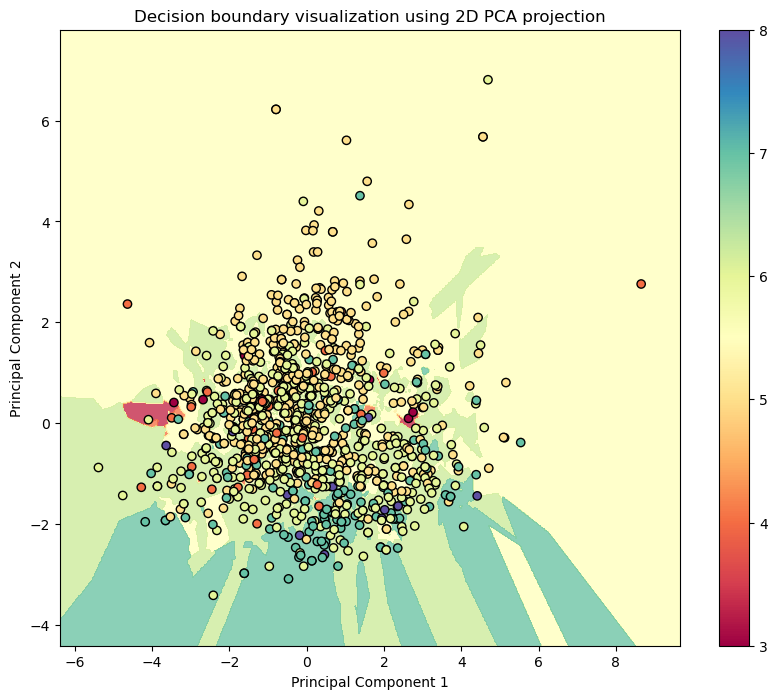

In [9]:
# Reducing dimensions with PCA for visualization purposes
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Re-splitting the dataset to reflect PCA transformation
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Train k-NN on two principal components
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train_pca)

# Create meshgrid for background color plot
h = 0.02
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict classifications for each point on meshgrid
Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Generate plot
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train_pca, cmap=plt.cm.Spectral, edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Decision boundary visualization using 2D PCA projection')
plt.colorbar()
plt.show()

### Accuracy Rate vs. k Value

Evaluating the accuracy for different values of 'k' can help in determining the most suitable number of neighbors for the k-NN classifier.


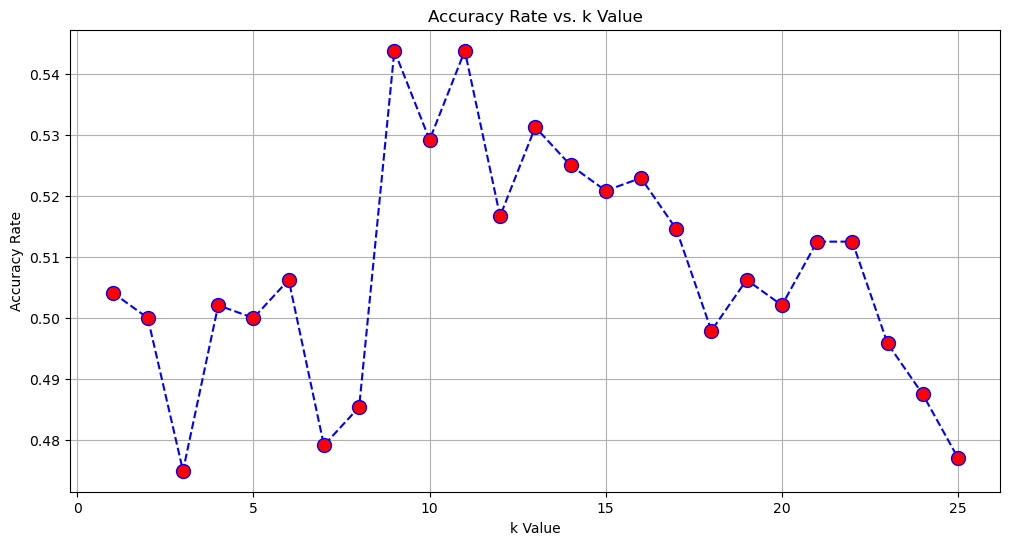

In [10]:
# Test various values of 'k' to find the best performance
k_range = range(1, 26)
accuracy_scores = []

for k in k_range:
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train_pca, y_train_pca)
    y_pred_temp = knn_temp.predict(X_test_pca)
    accuracy_scores.append(accuracy_score(y_test_pca, y_pred_temp))

# Plotting accuracy scores
plt.figure(figsize=(12, 6))
plt.plot(k_range, accuracy_scores, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. k Value')
plt.xlabel('k Value')
plt.ylabel('Accuracy Rate')
plt.grid(True)
plt.show()

### Error Rate vs. k Value

Observing how the error rate changes with different 'k' values is crucial for understanding model sensitivity and tuning k-NN hyperparameters effectively.


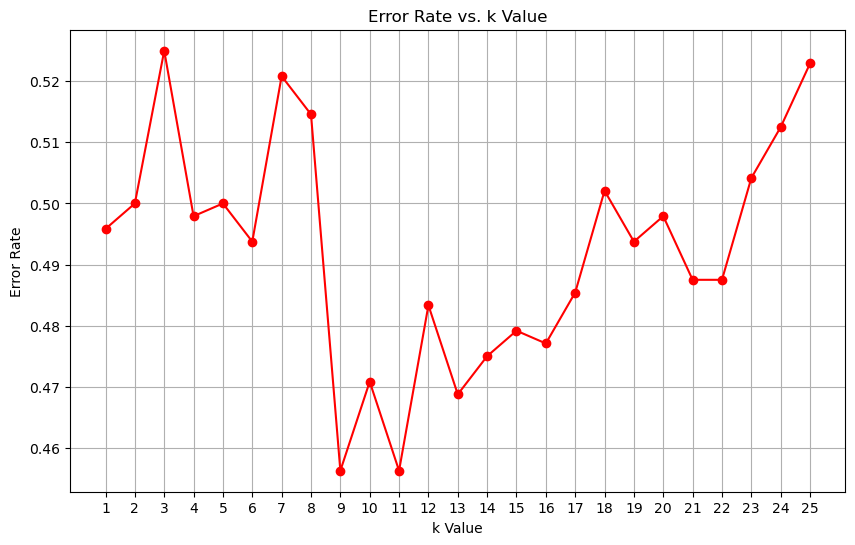

In [11]:
# Calculate error rates for different 'k' values
errors = []
for k in k_range:
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train_pca, y_train_pca)
    y_pred_temp = knn_temp.predict(X_test_pca)
    error = 1 - accuracy_score(y_test_pca, y_pred_temp)
    errors.append(error)

# Plotting error rates
plt.figure(figsize=(10, 6))
plt.plot(k_range, errors, marker='o', linestyle='-', color='red')
plt.title('Error Rate vs. k Value')
plt.xlabel('k Value')
plt.ylabel('Error Rate')
plt.xticks(k_range)
plt.grid(True)
plt.show()

## Conclusion

After applying the k-Nearest Neighbors (k-NN) algorithm to the Wine Quality Dataset, we can draw several key conclusions from the numeric metrics and visualizations produced:

- The **Mean Squared Error (MSE)** of the regression model is around 0.456, which gives us an indication of the average deviation of the predicted quality scores from the actual scores. While this suggests a reasonable level of prediction accuracy, it also signals potential areas for improvement.

- For the classification task, the model achieved an **accuracy of approximately 87%**. While this is a strong indicator of the model's ability to correctly classify the majority of the wines, it's worth noting the balance of precision and recall to fully assess model performance:
  - The **precision** for predicting low-quality wines is notably high at 0.91, which means that the model is reliable when it predicts that a wine is of low quality. However, the precision for high-quality wines is lower at 0.55, implying a relatively higher number of false positives for this class.
  - The **recall** is exceptionally high for low-quality wines at 0.94, showing the model's strength in identifying the majority of actual low-quality instances. In contrast, a recall of 0.45 for high-quality wines indicates that the model is missing over half of the actual high-quality wines.

- The F1-scores further support these findings, showcasing a strong model performance for low-quality wines (0.93) and a moderate performance for high-quality wines (0.49).

### Visual Analysis

- The **decision boundary visualization** using a 2D PCA projection reveals the complexity of the model's classification behavior. Although the model can separate different quality levels to some extent, the overlap in decision regions suggests that the model may struggle to distinguish between close quality scores.
  
- The plots for **Accuracy Rate vs. k Value** and **Error Rate vs. k Value** underline the importance of selecting an appropriate 'k'. These plots indicate a peak in performance at certain 'k' values, beyond which the accuracy declines and the error rate increases, hinting at over-generalization when too many neighbors are considered.

### Forward Path

From this analysis, it is clear that while the k-NN model is effective in classifying wine quality, especially for low-quality wines, it could be further optimized. Possible strategies for enhancement could include more refined hyperparameter tuning, exploring feature engineering to better capture the nuances of wine quality, or considering more complex models that may capture the underlying patterns in the data more effectively. The insights from the visualizations, in particular, should guide further refinement of the model to better handle the intricacies of the dataset.